# K-Nearest Neighbors
This assignment will use the Breast Cancer Wisconsin dataset. The goal of this assignment is to build a K-Nearest Neighbor model that best suits the data. You will need to determine the best value for 'k' and justify your answer. You will then report the accuracy of the learner. 

In [21]:
# Run this cell to load the dataset into a dataframe and split into training and testing sets. DO NOT CHANGE ANYTHING IN THIS CELL
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
target = df['target']
del df['target']
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

## Part 1
Please write your code in the following cell. Your job is to determine the best value for 'k'. Create multiple models using the numbers 1 through 40 and save the training and testing accuracy scores for each model. The training accuracy scores should be saved in an array called 'train_score'. The testing score should be saved in an array called 'test_score'. The range of 'k' values you are checking should be saved in a variable called 'ks'. If you do not use the exact names that have been specified the graphing function will not work. MAKE SURE YOU NAME EVERYTHING CORRECTLY. Once you have completed this task you can run the plotting code in next cell. You will use the resulting graph to answer the questions in part 2.

** When instantiating your model do NOT set the distance metric. The only hyperparamater you should be setting is 'n_neighbors' **

In [22]:
from sklearn.neighbors import KNeighborsClassifier

ks = range(1,41)
train_score = []
test_score = []

for k in ks:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))

    knn.fit(X_test,y_test)
    test_score.append(knn.score(X_test,y_test))   


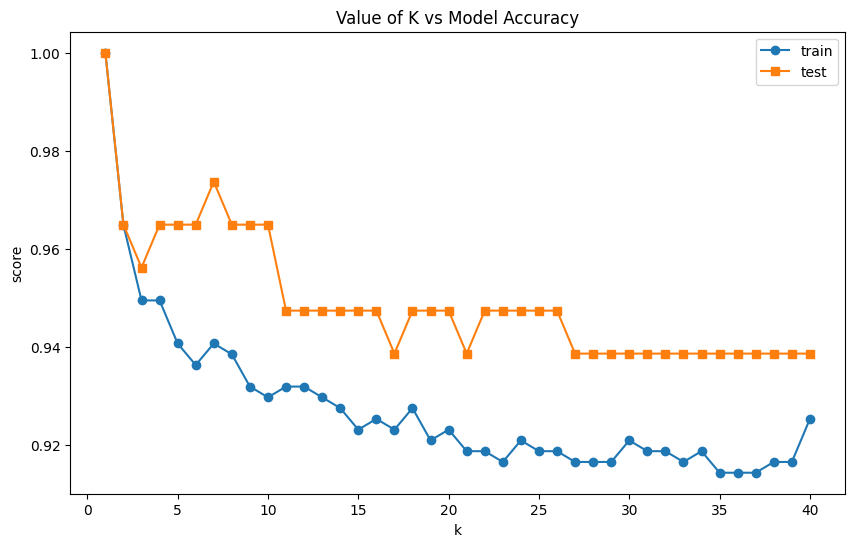

In [24]:
# Plotting the results - you don't need to change anything in this cell
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(ks , train_score, 'o-', label='train')
plt.plot(ks , test_score, 's-', label='test')
plt.xlabel('k')
plt.ylabel('score')
plt.title('Value of K vs Model Accuracy')
plt.legend()

## Part 2
Using the graph, answer the following questions in DETAIL. If your answers are not clearly explained you will lose credit

1) Which value of 'k' results in the least amount of vairance. Explain your choice

2) Which value of 'k' returns the greatest accuracy on the training data? Based how the KNN algorithm works, explain why this is the case. Can there be better values for 'k' when we want good accuracy on the training data?

3) At which value of 'k' is the model most overfit? Explain.

4) Explain why there is a difference in performace between k=1 and k=40 for the training data

5) Explain why there is a difference in performace between k=1 and k=40 for the testing data

6) You are given 500 rows of new data that the model has never seen before. Which value of 'k' are you choosing? Justify your answer

1. When K = 1, there is the least ammount of variance,  because the training and testing data are returning the same results.
2. K = 1 returns the greatest accuracy on the training data. Because the KNN algorithm picks  the K closest  neighbors, if K is one, and it is performing on the training data, that 1 point that it picks IS the point that we are trying to figure  out which class it falls into. There cannot be better values for K, because this 1 point is the same point, so it will ALWAYS be the righ class!
3. At K = 1 the model  is the most overfit, because it is only taking 1 data point form the training dtata, so it will be that point, and way too similar to the training data, not averaging a couple points around it.
4. When K = 1, it is overfit, so the training data will perform the best, because it is only looking at that exact point, but the larger K is, the more  underfit we get, so if K = 40, it is very underfit, and we are looking at lots of points, so even for the training data, it is averaging all of them, and not necessarily gettting the exact value it is.
5. When K = 1,  the data is very overfit, so the testing data will most likely not perfom very well, but when K is very large, like K =  40, it gets too underfit, and is averaging too many values  to be accurate.
6. I would choose K = 3, because even though at K =  1, the training and testing are both 100% accurate, it could just be this  tesing data  is very similar to the testing data, and there are no outliers.  By K = 3, there is low vairance, and they are both pretty accurate.

## Part 3
Repeat Part 1 using difference distance metrics. 


Step 1: Choose one of the distance merics from [this](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics) site (you can pick any metric besides 'cosine') and save the training and testing scores like in Part 1. Once you are done, graph the results. 

Step  2: In the next cell repeat the process setting the distance metric to 'cosine'. Graph the results.

Step 3: Once you have completed both graphs, write a comment explaining which metric you think is best to use on this dataset. Explain why distance metrics are important and why performance might vary when the distance metric is changed

** You must use the same variable names as you did in Part 1.The training accuracy scores should be saved in an array called 'train_score'. The testing score should be saved in an array called 'test_score'. The range of 'k' values you are checking should be saved in a variable called 'ks'. If you do not use the exact names that have been specified the graphing function will not work. MAKE SURE YOU NAME EVERYTHING CORRECTLY.  **

In [28]:
# Write your code for Step 1 in this cell
from sklearn.metrics import pairwise_distances
# An example of setting the distance metric is: model = KNeighborsClassifier(n_neighbors = k, metric='cosine')
ks = range(1,41)
train_score = []
test_score = []

for k in ks:
    knn= KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))

    knn.fit(X_test,y_test)
    test_score.append(knn.score(X_test,y_test))

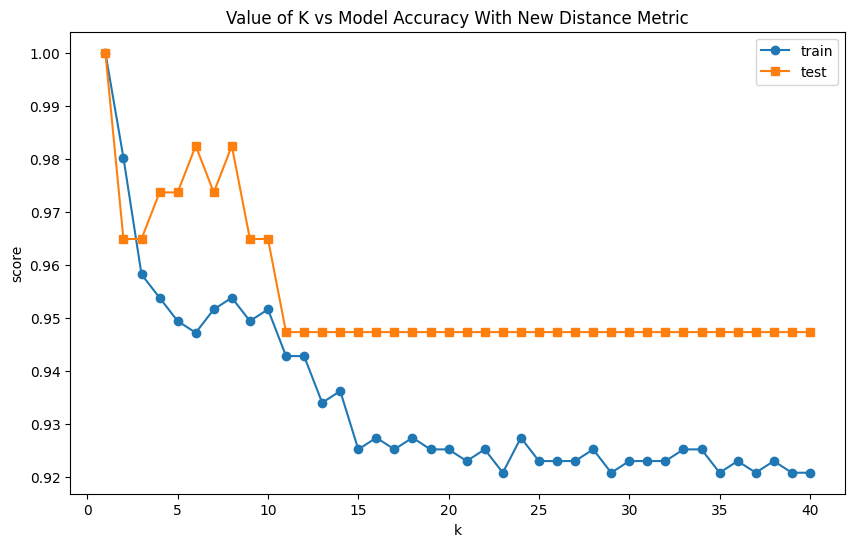

In [29]:
# Plotting the results - you don't need to change anything in this cell
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(ks , train_score, 'o-', label='train')
plt.plot(ks , test_score, 's-', label='test')
plt.xlabel('k')
plt.ylabel('score')
plt.title('Value of K vs Model Accuracy With New Distance Metric')
plt.legend()

In [30]:
# Write your code for Step 2 in this cell
from sklearn.metrics import pairwise_distances
# An example of setting the distance metric is: model = KNeighborsClassifier(n_neighbors = k, metric='cosine')
ks = range(1,41)
train_score = []
test_score = []

for k in ks:
    knn= KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))

    knn.fit(X_test,y_test)
    test_score.append(knn.score(X_test,y_test))

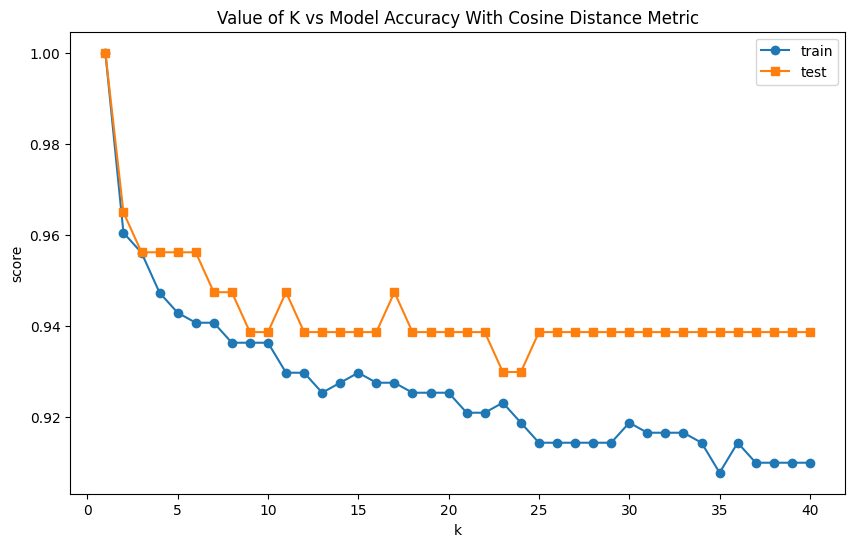

In [31]:
# Plotting the results - you don't need to change anything in this cell
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(ks , train_score, 'o-', label='train')
plt.plot(ks , test_score, 's-', label='test')
plt.xlabel('k')
plt.ylabel('score')
plt.title('Value of K vs Model Accuracy With Cosine Distance Metric')
plt.legend()

I think that cosine is best to use on this dataset, because both the training set and the testing set perform more accurately with this metric.
Distance metrics  are important, because they are different ways of measuring which points are closer. Depending on which points are closer, what we take into account and what algorithm we use to average all the points, the answer for can be different. For example, if we average verses majority, we can get different answers.